Titanic - Machine learning from disasters
    Kaggle Competition

In [1]:
#Importando bibliotecas
import pandas as pd
import numpy as np

In [2]:
#Leitura do arquivo csv
titanic = pd.read_csv('train.csv')

In [3]:
#Visualização da base de dados
titanic.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
#Tamanho da base
titanic.shape

(891, 12)

In [5]:
#Visualizar informações da base
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#Observar valores vazios
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Vamos fazer a Limpeza dos dados

In [7]:
#Começar a limpeza pelas idades
titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [8]:
#Importar statistics, seaborn e matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as sts

/Users/naylla/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Text(0.5, 1.0, 'Age')

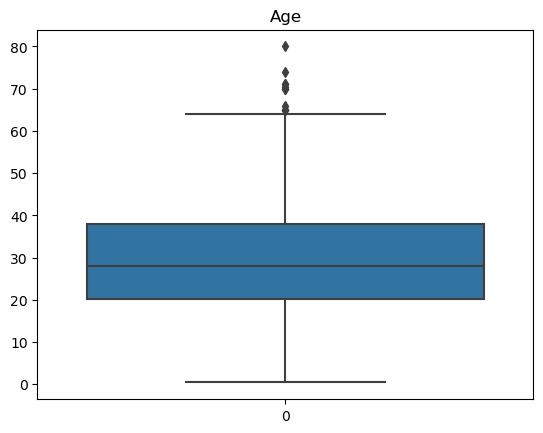

In [9]:
#Visualizar um boxplot das idades
sns.boxplot(titanic["Age"]).set_title("Age")

In [10]:
#Visualizar a moda, para substituir os valores vazios (poderia ser média ou media)
moda = sts.mode(titanic['Age'])
moda

24.0

In [11]:
frequencia_moda = titanic['Age'].value_counts()[moda]
frequencia_moda

30

In [12]:
#como temos alguns outliers não é bom usar média
#a moda aparece nem 10% da quantidade total 
#Por isso nesse caso escolhi usar a mediana para substituir os valores vazios
mediana = titanic['Age'].dropna().median()
mediana

28.0

In [13]:
titanic['Age'].fillna(mediana, inplace=True)

In [14]:
#Visualizar a coluna de sexo
agrupado_sex = titanic.groupby(['Sex']).size()
agrupado_sex

Sex
female    314
male      577
dtype: int64

In [15]:
#Visualizar a coluna de SibSp
agrupado_sibsp = titanic.groupby(['SibSp']).size()
agrupado_sibsp

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
dtype: int64

In [16]:
#Visualizar a coluna fare
titanic['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Text(0.5, 1.0, 'Fare')

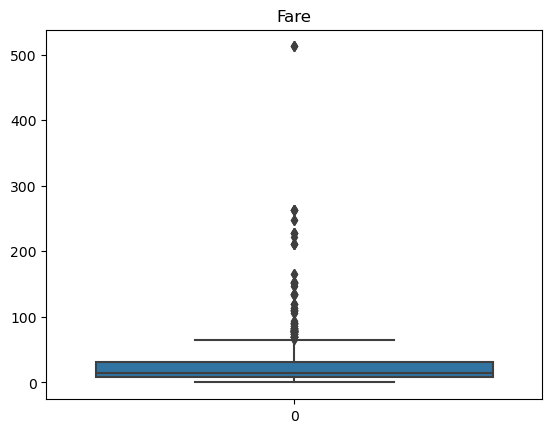

In [17]:
sns.boxplot(titanic["Fare"]).set_title("Fare")

/var/folders/21/kht1g5ps5b9dh9hfts6h6vc00000gp/T/ipykernel_29887/3882683120.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic["Fare"]).set_title("Fare")


Text(0.5, 1.0, 'Fare')

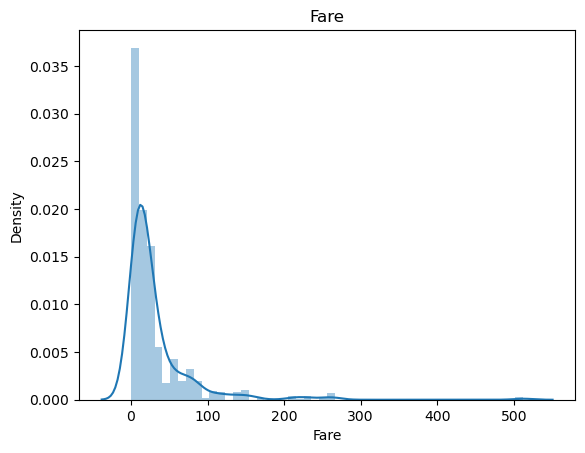

In [18]:
#Observamos com o boxplot que existem muitos outliers, vamos analisar melhor com outro gráfico
sns.distplot(titanic["Fare"]).set_title("Fare")

##Mesmo após observar grandes outliers, foi visto que não são erros e existiram sim esses valores de tarifas pagos.

In [19]:
#Analise do porto de embarcação
agrupado_Embarked = titanic.groupby(['Embarked']).size()
agrupado_Embarked

Embarked
C    168
Q     77
S    644
dtype: int64

In [20]:
moda = sts.mode(titanic['Embarked'])
moda

'S'

In [21]:
#Substituir os 2 valores vazios pela moda que é 's' Southampton
titanic['Embarked'].fillna(moda, inplace=True)

In [22]:
#Vamos excluir algumas colunas que não são importantes para essa análise  
#A cabine que possue muitos valores vazios e também não são relevantes
#Os tickes que possuem muitos valores e também são irrelevantes nessa análise
titanic = titanic.drop(["Ticket", "Cabin"], axis = 1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


**Vamos padronizar nossos valores

In [23]:
#Observar a estatistica geral 
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
# Importando o MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [25]:
#Criar o Scaler
scaler = MinMaxScaler()

In [26]:
#Fazer o Fit dos dados
scaler = scaler.fit(titanic[['Age']])

In [27]:
#Fazer o transform criando a nova couna
titanic['Age_minmax'] = scaler.transform(titanic[['Age']])

In [28]:
scaler = scaler.fit(titanic[['Fare']])

In [29]:
#Fazer o transform
titanic['Fare_minmax'] = scaler.transform(titanic[['Fare']])

In [30]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_minmax,Fare_minmax
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.363679,0.062858
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.163605,0.096995
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.271174,0.015440
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.346569,0.028213
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,0.434531,0.060508
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000


In [31]:
titanic = titanic.drop(["Age", "Fare"], axis = 1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Embarked,Age_minmax,Fare_minmax
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,S,0.271174,0.014151
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,C,0.472229,0.139136
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,S,0.321438,0.015469
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,S,0.434531,0.103644
4,5,0,3,"Allen, Mr. William Henry",male,0,0,S,0.434531,0.015713


**Tratar alguns dados com a Engenharia de recurso

In [32]:
#Importar oneHotEncoder
from sklearn.preprocessing import OneHotEncoder

In [33]:
ohe = OneHotEncoder()

In [34]:
ohe_transform = ohe.fit_transform(titanic[["Sex", "Embarked"]])

In [35]:
#Nome das features
ohe.get_feature_names_out()

array(['Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype=object)

In [36]:
ohe_transform.toarray()

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [37]:
#Transformar dados em dataframe
df_ohe = pd.DataFrame(ohe_transform.toarray())
df_ohe.columns = ohe.get_feature_names_out()
df_ohe.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0


In [38]:
#Concatenando as duas bases 
titanic = pd.concat([titanic, df_ohe],  axis = 1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Embarked,Age_minmax,Fare_minmax,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,S,0.271174,0.014151,0.0,1.0,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,C,0.472229,0.139136,1.0,0.0,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,S,0.321438,0.015469,1.0,0.0,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,S,0.434531,0.103644,1.0,0.0,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,S,0.434531,0.015713,0.0,1.0,0.0,0.0,1.0


In [39]:
#Retirar as colunas de string
titanic = titanic.drop(['Sex', 'Embarked'], axis = 1)
titanic.head()

,PassengerId,Survived,Pclass,Name,SibSp,Parch,Age_minmax,Fare_minmax,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,0,0.271174,0.014151,0.0,1.0,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,0.472229,0.139136,1.0,0.0,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0.321438,0.015469,1.0,0.0,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,0.434531,0.103644,1.0,0.0,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",0,0,0.434531,0.015713,0.0,1.0,0.0,0.0,1.0


In [40]:
titanic = titanic.drop(['Name'], axis = 1)
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Age_minmax,Fare_minmax,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,0,0.271174,0.014151,0.0,1.0,0.0,0.0,1.0
1,2,1,1,1,0,0.472229,0.139136,1.0,0.0,1.0,0.0,0.0
2,3,1,3,0,0,0.321438,0.015469,1.0,0.0,0.0,0.0,1.0
3,4,1,1,1,0,0.434531,0.103644,1.0,0.0,0.0,0.0,1.0
4,5,0,3,0,0,0.434531,0.015713,0.0,1.0,0.0,0.0,1.0


**Criar modelo para fazer as previsões

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

In [42]:
#Separar variaveis 
X = titanic.drop('Survived', axis = 1)
y = titanic.Survived

In [43]:
#Dividir treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [44]:
#Criar modelo de treinamento
reg = LinearRegression().fit(X_train, y_train)

In [45]:
#Fazer a previsão do dados de teste
previsao = reg.predict(X_test)
previsao

array([ 1.77727666e-01,  1.08699413e-01,  1.10161546e-01,  1.01328005e+00,
        6.50110633e-01,  4.47023945e-01,  9.22445619e-01,  9.46966712e-01,
        5.02775373e-01,  6.86061692e-01,  7.43703587e-02,  7.15874570e-01,
        1.80818609e-01,  8.80824214e-01,  1.06296099e+00,  7.03323799e-01,
        1.39575314e-01,  2.74778334e-01,  6.77249888e-02,  3.21025997e-01,
        3.35518626e-01,  1.02758423e+00,  1.79013095e-01,  4.47260893e-01,
        6.55375834e-01,  9.21687407e-01,  8.56427254e-02,  6.55779378e-01,
        7.90069683e-01,  6.07185608e-01,  1.47186005e-01,  6.55876588e-01,
        1.10672368e-01,  4.49278880e-01,  5.71601797e-02,  4.88908414e-01,
        1.94926560e-02,  2.74030372e-01,  2.93123466e-01,  1.23694653e-01,
        2.76328186e-01,  1.92610843e-01,  1.11128642e-01,  1.83083265e-04,
        8.86008380e-01,  1.10496741e-01,  1.08778570e-01,  1.02728680e+00,
        2.10223969e-01,  2.58111064e-01,  4.45505334e-01,  5.37041022e-01,
        8.67233289e-01,  

In [46]:
#Achar o erro quadratico e o absoluto
#Importar o erro absoluto e o quadratico medio 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [47]:
print(mean_squared_error(y_test, previsao))
print(mean_absolute_error(y_test, previsao))

0.14115203241362329
0.29289244522042257


In [48]:
#Usando Random Forest
floresta = RandomForestClassifier(n_estimators = 300)
floresta.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [49]:
previsao_RF = floresta.predict(X_test)
previsao_RF

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [50]:
print(mean_squared_error(y_test, previsao_RF))
print(mean_absolute_error(y_test, previsao_RF))

0.1865671641791045
0.1865671641791045


In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [52]:
taxa_acerto = accuracy_score(y_test, previsao_RF)
taxa_acerto

0.8134328358208955

**Vamos importar a base de teste do kaggle

In [53]:
teste_titanic = pd.read_csv('test.csv')
teste_titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [54]:
#Aplicar a mesma limpeza da base de treino na base de teste 
#Comecar eliminando colunas Cabin e Name
teste_titanic = teste_titanic.drop(['Name', 'Cabin'], axis = 1)

In [55]:
#Observar valores vazios
teste_titanic.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [56]:
#Substituir vazios de Age pela mediana
mediana = teste_titanic['Age'].dropna().median()
teste_titanic['Age'].fillna(mediana, inplace=True)

In [57]:
#O valor de Fare como só tem 1 vazio poderia ir atras de descobrir certinho, mas vou colocar a moda
moda = sts.mode(teste_titanic['Fare'])
teste_titanic['Fare'].fillna(moda, inplace=True)

In [58]:
#Os tickes que possuem muitos valores e também são irrelevantes nessa análise
teste_titanic = teste_titanic.drop(["Ticket"], axis = 1)

In [59]:
#Tratare dados de Age, Fare
#Criar o Scaler
scaler = MinMaxScaler()

In [60]:
scaler = scaler.fit(teste_titanic[['Age']])
teste_titanic['Age_minmax'] = scaler.transform(teste_titanic[['Age']])
teste_titanic[['Age', 'Age_minmax']].describe()

,Age,Age_minmax
count,418.000000,418.000000
mean,29.599282,0.388096
std,12.703770,0.167530
min,0.170000,0.000000
25%,23.000000,0.301068
50%,27.000000,0.353818
75%,35.750000,0.469207
max,76.000000,1.000000


In [61]:
scaler = scaler.fit(teste_titanic[['Fare']])
teste_titanic['Fare_minmax'] = scaler.transform(teste_titanic[['Fare']])
teste_titanic[['Fare', 'Fare_minmax']].describe()

,Fare,Fare_minmax
count,418.000000,418.000000
mean,35.560497,0.069409
std,55.857145,0.109026
min,0.000000,0.000000
25%,7.895800,0.015412
50%,14.454200,0.028213
75%,31.471875,0.061429
max,512.329200,1.000000


In [62]:
teste_titanic = teste_titanic.drop(["Age", "Fare"], axis = 1)
teste_titanic.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Age_minmax,Fare_minmax
0,892,3,male,0,0,Q,0.452723,0.015282
1,893,3,female,1,0,S,0.617566,0.013663
2,894,2,male,0,0,Q,0.815377,0.018909
3,895,3,male,0,0,S,0.353818,0.016908
4,896,3,female,1,1,S,0.287881,0.023984


In [63]:
ohe_transform = ohe.fit_transform(teste_titanic[["Sex", "Embarked"]])

In [64]:
ohe.get_feature_names_out()

array(['Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype=object)

In [65]:
ohe_transform.toarray()

array([[0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [0., 1., 1., 0., 0.]])

In [66]:
#Transformar dados em dataframe
df_ohe = pd.DataFrame(ohe_transform.toarray())
df_ohe.columns = ohe.get_feature_names_out()
df_ohe.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0


In [67]:
#Concatenando as duas bases 
teste_titanic = pd.concat([teste_titanic, df_ohe],  axis = 1)
teste_titanic.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Age_minmax,Fare_minmax,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,male,0,0,Q,0.452723,0.015282,0.0,1.0,0.0,1.0,0.0
1,893,3,female,1,0,S,0.617566,0.013663,1.0,0.0,0.0,0.0,1.0
2,894,2,male,0,0,Q,0.815377,0.018909,0.0,1.0,0.0,1.0,0.0
3,895,3,male,0,0,S,0.353818,0.016908,0.0,1.0,0.0,0.0,1.0
4,896,3,female,1,1,S,0.287881,0.023984,1.0,0.0,0.0,0.0,1.0


In [68]:
#Ecluir colunas
teste_titanic = teste_titanic.drop(['Sex', 'Embarked'], axis = 1)
teste_titanic.head()

,PassengerId,Pclass,SibSp,Parch,Age_minmax,Fare_minmax,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,0,0,0.452723,0.015282,0.0,1.0,0.0,1.0,0.0
1,893,3,1,0,0.617566,0.013663,1.0,0.0,0.0,0.0,1.0
2,894,2,0,0,0.815377,0.018909,0.0,1.0,0.0,1.0,0.0
3,895,3,0,0,0.353818,0.016908,0.0,1.0,0.0,0.0,1.0
4,896,3,1,1,0.287881,0.023984,1.0,0.0,0.0,0.0,1.0


**Usar a base de treino com o teste do kaggle

In [69]:
test_predict = floresta.predict(teste_titanic)

In [70]:
teste_titanic['Survived'] = test_predict
teste_titanic.head(15)

,PassengerId,Pclass,SibSp,Parch,Age_minmax,Fare_minmax,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,892,3,0,0,0.452723,0.015282,0.0,1.0,0.0,1.0,0.0,0
1,893,3,1,0,0.617566,0.013663,1.0,0.0,0.0,0.0,1.0,0
2,894,2,0,0,0.815377,0.018909,0.0,1.0,0.0,1.0,0.0,0
3,895,3,0,0,0.353818,0.016908,0.0,1.0,0.0,0.0,1.0,0
4,896,3,1,1,0.287881,0.023984,1.0,0.0,0.0,0.0,1.0,0
5,897,3,0,0,0.182382,0.018006,0.0,1.0,0.0,0.0,1.0,0
6,898,3,0,0,0.393380,0.014891,1.0,0.0,0.0,1.0,0.0,0
7,899,2,1,1,0.340630,0.056604,0.0,1.0,0.0,0.0,1.0,0
8,900,3,0,0,0.235131,0.014110,1.0,0.0,1.0,0.0,0.0,1
9,901,3,2,0,0.274693,0.047138,0.0,1.0,0.0,0.0,1.0,0


In [71]:
#Buscar apenas PassengerId e Survived
Resultado = teste_titanic[['PassengerId', 'Survived']]
Resultado.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [72]:
#Exportar resultado
Resultado.to_csv('Resultado.csv', index = False)